In [1]:
# import pandas as pd

# # df = pd.read_csv('./output_table_page_1.csv').drop(['Unnamed: 0'], axis=1)
# # df.to_csv('./output_table_page_1.csv', index=False)

# df_ls = []
# for i in range(1,17):
#     df = pd.read_csv(f'./data/output_table_page_{i}.csv')
#     df.columns = ['Sl.','District','Site','pH','EC','TDS','CO3','HCO3','Cl','NO3','SO4','F','Alk','Ca','Mg','TH','Na','K','SAR']
#     df_ls.append(df)

# df = pd.concat(df_ls).reset_index(drop=True)

Code Starts Here

Importing the Basic Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
import warnings
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Importing the dataset

In [3]:
df = pd.read_csv('./refined-data/eval_data.csv')
df.head()

,DISTRICT,LOCATION,PH,EC,TDS,TH,CA,MG,NA,K,CO3,HCO3,CL,NO3,SO4,F,ALK,YEAR,SAR
0,Ahmedabad,Barvala,8.25,5090.0,3410.0,450.0,80.0,60.0,937.0,0.3,0.0,891.0,959.0,24.0,346.0,2.80,730.0,2017,NaN
1,Ahmedabad,Dhandhuka1,8.23,14210.0,9521.0,1300.0,180.0,207.0,3220.0,9.9,0.0,1013.0,3373.0,1600.0,1290.0,6.64,830.0,2017,NaN
2,Ahmedabad,Endla,8.17,685.0,459.0,220.0,52.0,22.0,49.0,13.6,0.0,305.0,50.0,2.0,2.0,0.44,250.0,2017,NaN
3,Ahmedabad,Kumarkhan,8.19,10660.0,7142.0,800.0,140.0,109.0,1875.0,7.2,0.0,988.0,2485.0,32.0,443.0,11.20,810.0,2017,NaN
4,Ahmedabad,Kundali,8.03,1300.0,871.0,280.0,64.0,29.0,210.0,3.7,0.0,305.0,85.0,230.0,171.0,0.50,250.0,2017,NaN


In [4]:
df.columns

Index(['DISTRICT', 'LOCATION', 'PH', 'EC', 'TDS', 'TH', 'CA', 'MG', 'NA', 'K',
       'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'YEAR', 'SAR'],
      dtype='object')

EDA

<Axes: >

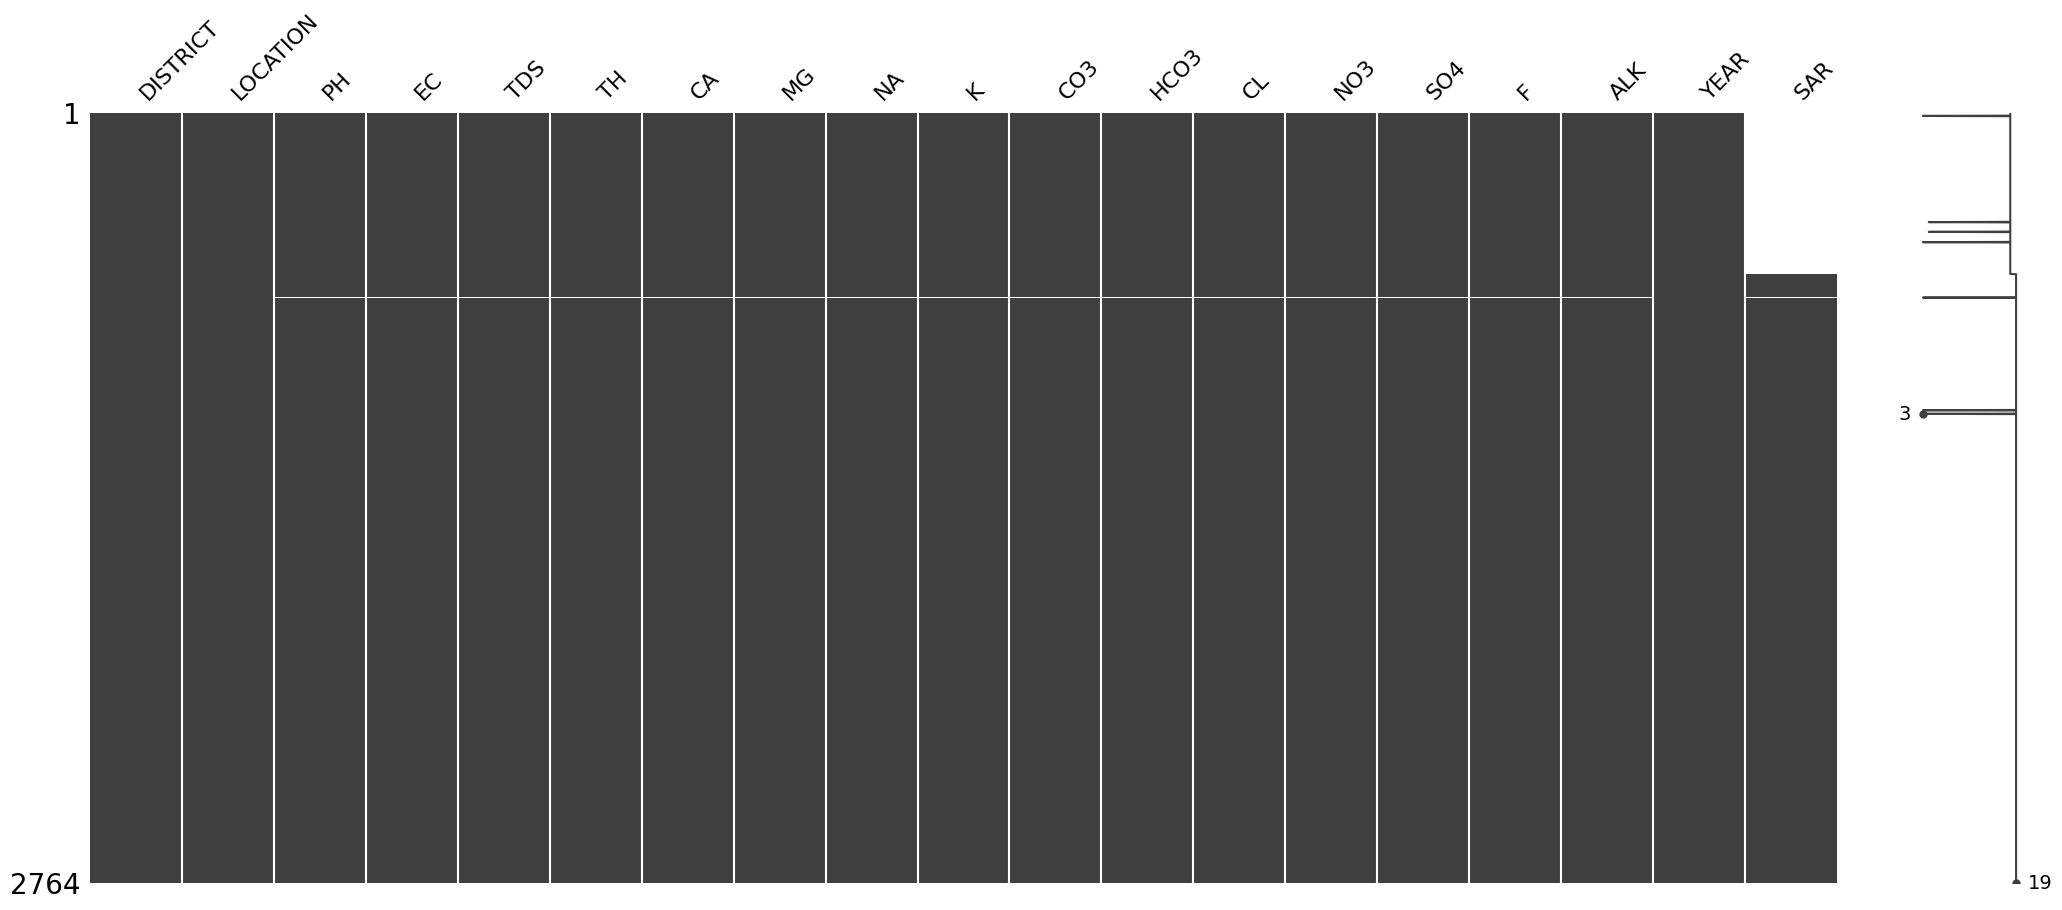

In [5]:
mno.matrix(df)

In [6]:
df.isnull().sum()

DISTRICT      0
LOCATION      0
PH            7
EC            5
TDS           7
TH            7
CA            7
MG            7
NA            7
K             7
CO3           7
HCO3          7
CL            7
NO3           7
SO4           7
F             7
ALK           7
YEAR          0
SAR         581
dtype: int64

In [7]:
df.nunique()

DISTRICT      51
LOCATION    1114
PH           206
EC          1802
TDS         1944
TH           335
CA           191
MG           291
NA           688
K            646
CO3           39
HCO3         182
CL           466
NO3          523
SO4          485
F            313
ALK          189
YEAR           5
SAR          911
dtype: int64

Extremely high cardinality columns are not useful for our analysis. So we will drop them. Here Location.

In [8]:
df.drop(['LOCATION', 'DISTRICT'], axis=1, inplace=True)

In [9]:
sns.set()
sns.set_palette('bright')

<Axes: >

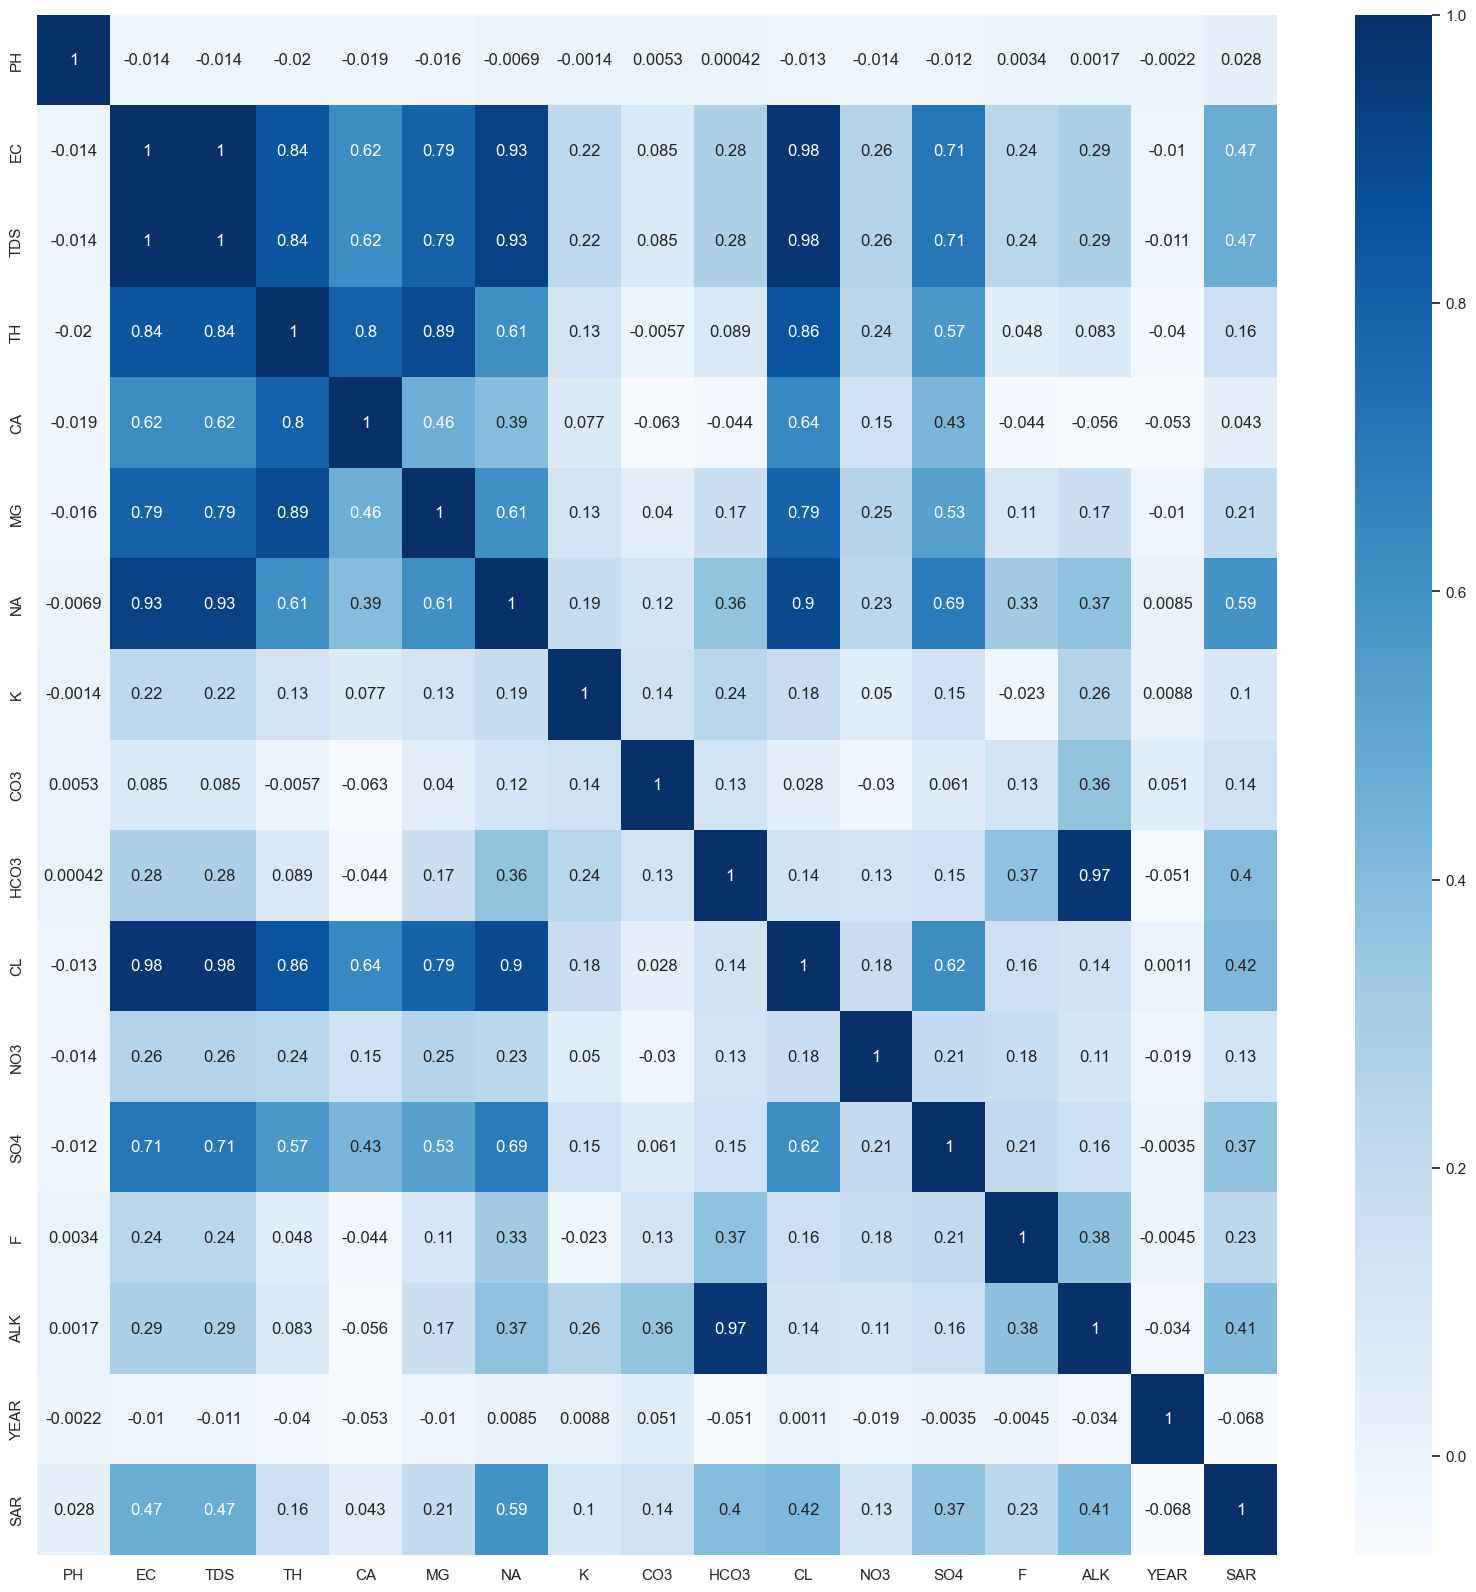

In [10]:
plt.figure(figsize=(20,20))
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, cmap='Blues')

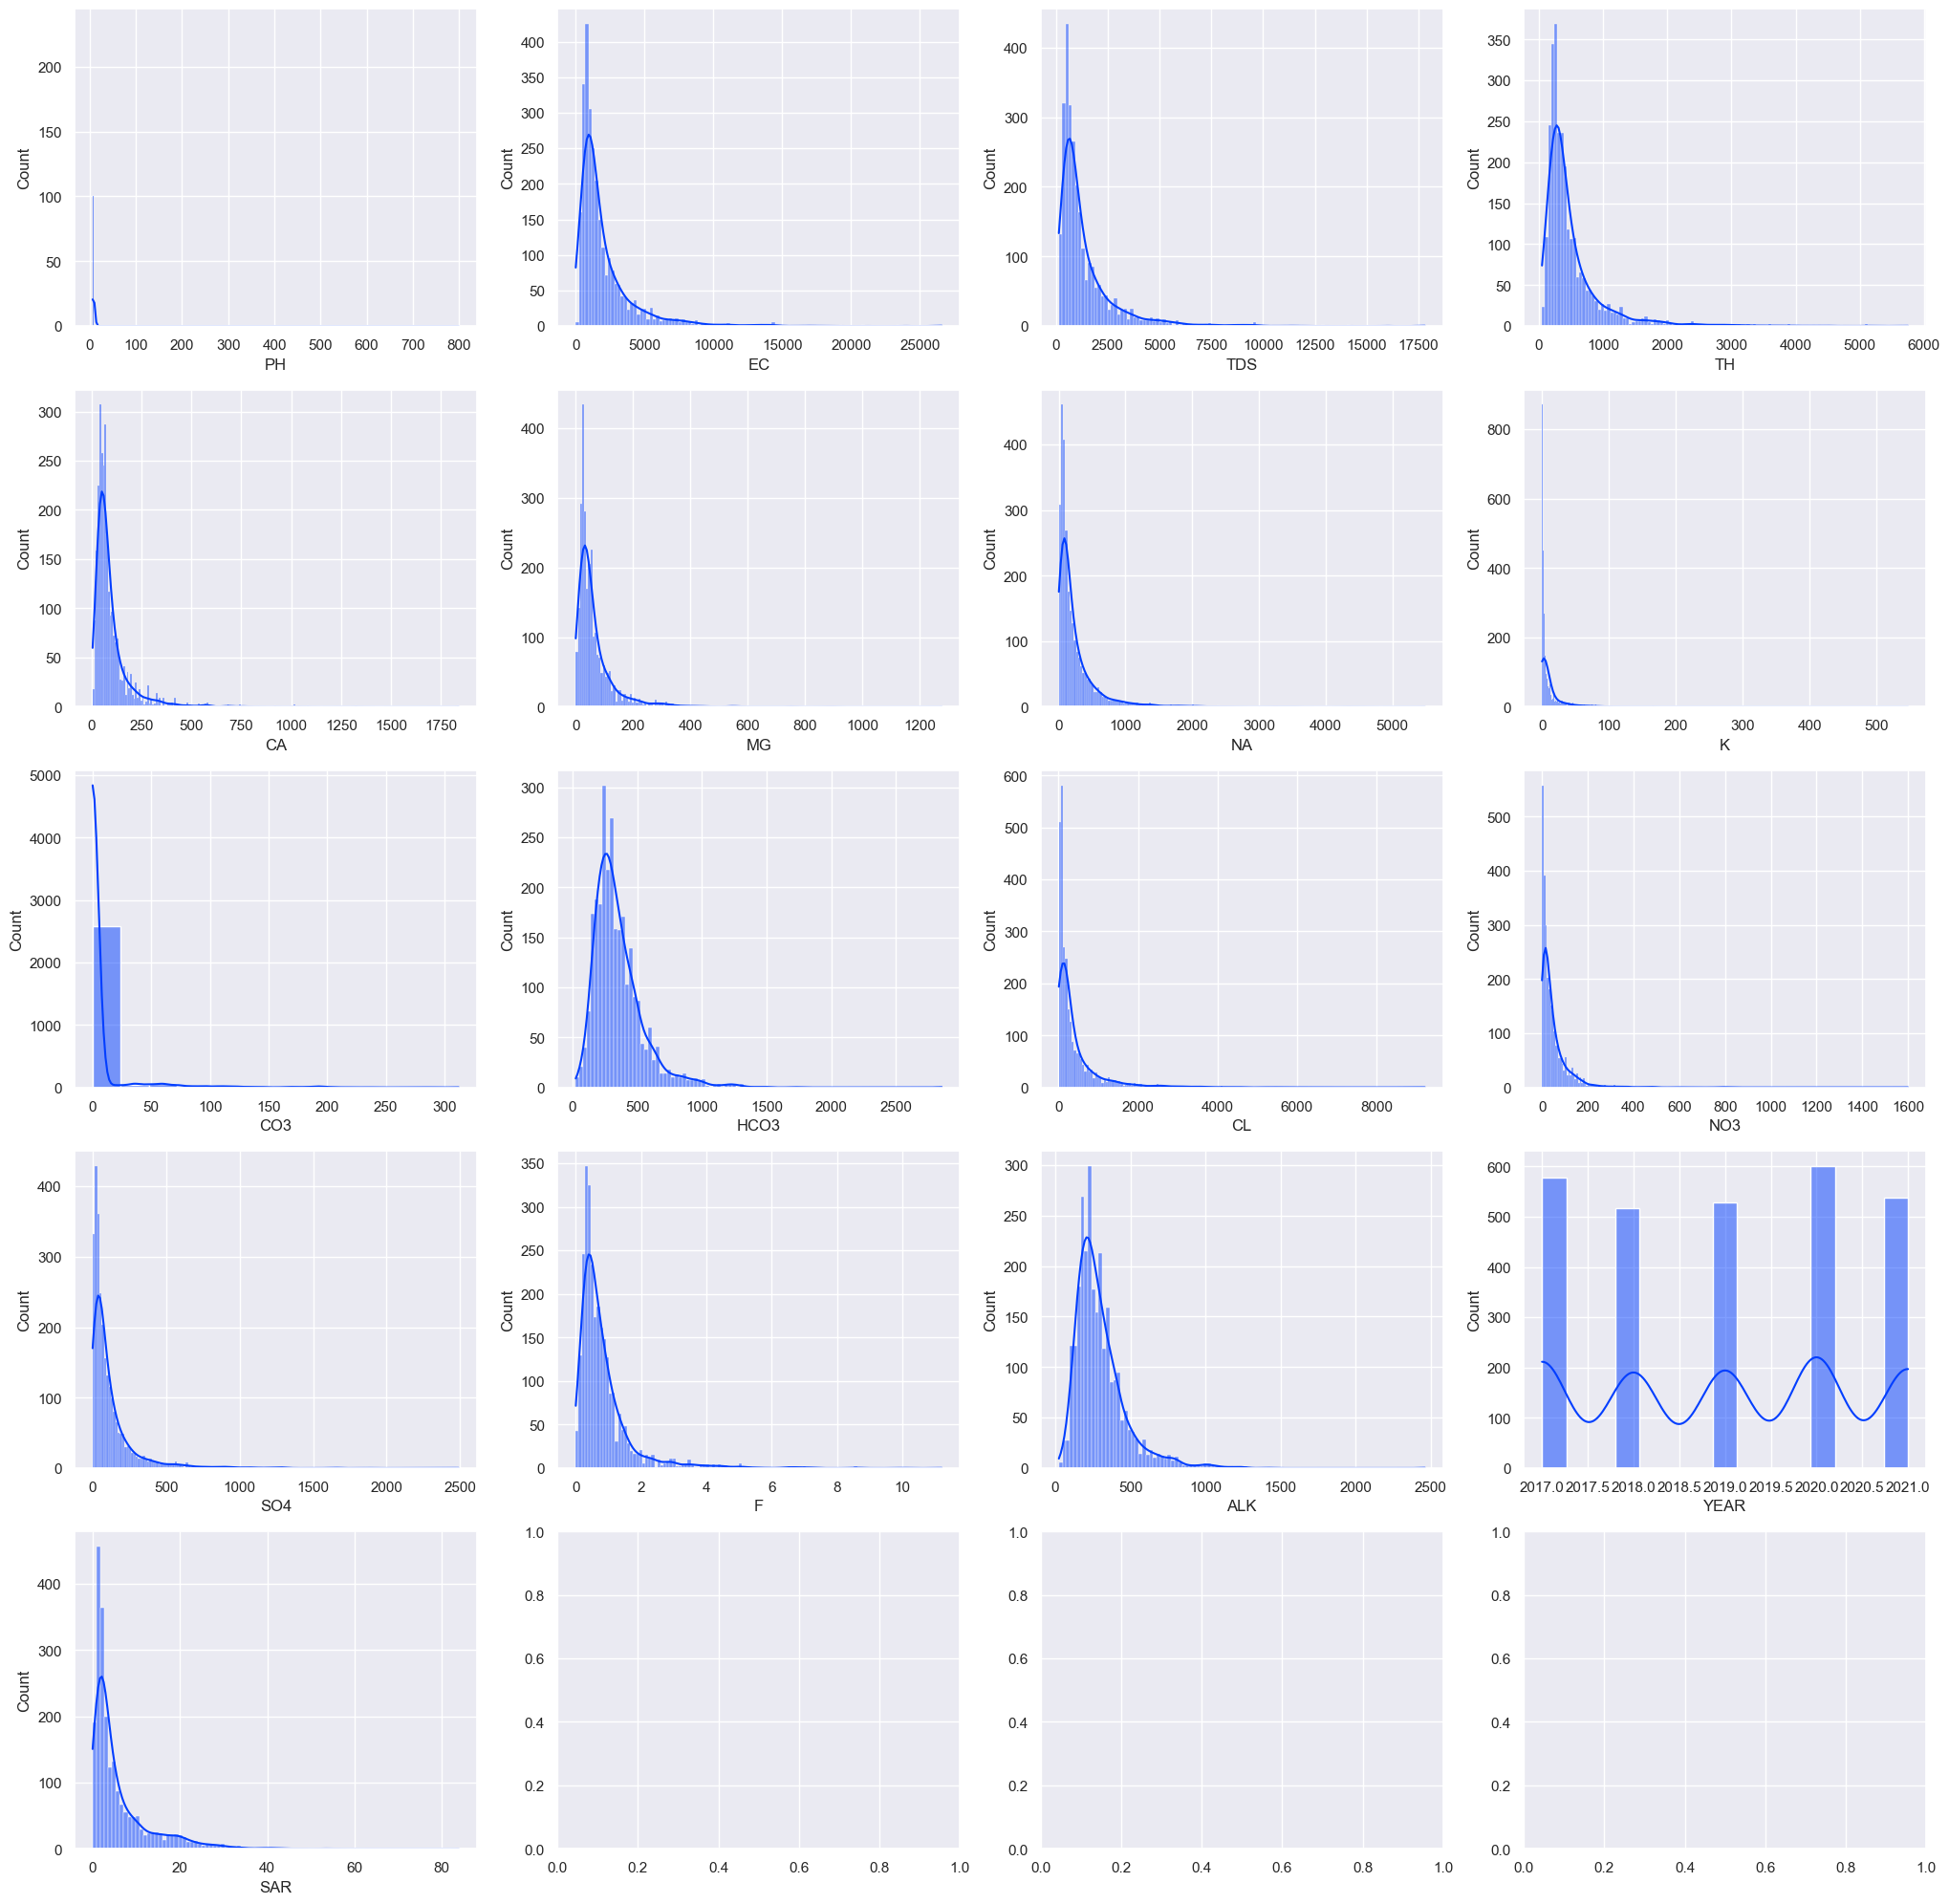

In [11]:
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(5, 4, figsize=(25,25))
for col, ax in zip(df.columns, axes.flatten()):
    sns.histplot(df[col], ax=ax, kde=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH      2757 non-null   float64
 1   EC      2759 non-null   float64
 2   TDS     2757 non-null   float64
 3   TH      2757 non-null   float64
 4   CA      2757 non-null   float64
 5   MG      2757 non-null   float64
 6   NA      2757 non-null   float64
 7   K       2757 non-null   float64
 8   CO3     2757 non-null   float64
 9   HCO3    2757 non-null   float64
 10  CL      2757 non-null   float64
 11  NO3     2757 non-null   float64
 12  SO4     2757 non-null   float64
 13  F       2757 non-null   float64
 14  ALK     2757 non-null   float64
 15  YEAR    2764 non-null   int64  
 16  SAR     2183 non-null   float64
dtypes: float64(16), int64(1)
memory usage: 367.2 KB


In [13]:
df.describe()

,PH,EC,TDS,TH,CA,MG,NA,K,CO3,HCO3,CL,NO3,SO4,F,ALK,YEAR,SAR
count,2757.000000,2759.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2764.000000,2183.000000
mean,8.157010,2076.725991,1391.913232,519.195775,95.695922,67.271352,247.295067,12.580522,5.499456,354.004155,423.964429,49.416551,121.554168,0.838244,298.988342,2019.001085,5.984293
std,15.071265,2361.403781,1582.360235,543.588852,105.238872,86.704734,373.139045,34.991007,24.696145,198.124580,740.204009,77.961668,183.861066,0.895874,173.028541,1.421488,7.184936
min,6.220000,0.000000,138.690000,50.000000,4.000000,0.000000,2.000000,0.000000,0.000000,24.000000,7.000000,0.000000,0.000000,0.000000,24.000000,2017.000000,0.000000
25%,7.650000,790.500000,529.970000,240.000000,44.000000,24.000000,61.000000,0.900000,0.000000,220.000000,78.000000,9.700000,28.000000,0.350000,190.000000,2018.000000,1.595000
50%,7.890000,1297.000000,868.990000,350.000000,64.000000,41.000000,119.000000,2.640000,0.000000,305.000000,170.000000,26.000000,62.000000,0.580000,260.000000,2019.000000,3.020000
75%,8.120000,2439.000000,1633.460000,580.000000,104.000000,75.000000,287.000000,9.400000,0.000000,427.000000,454.000000,60.000000,137.000000,1.000000,360.000000,2020.000000,7.400000
max,799.000000,26580.000000,17808.600000,5750.000000,1840.000000,1277.000000,5489.000000,547.000000,312.000000,2855.000000,9217.000000,1600.000000,2490.000000,11.200000,2460.000000,2021.000000,83.870000


In [14]:
df.columns

Index(['PH', 'EC', 'TDS', 'TH', 'CA', 'MG', 'NA', 'K', 'CO3', 'HCO3', 'CL',
       'NO3', 'SO4', 'F', 'ALK', 'YEAR', 'SAR'],
      dtype='object')

Dealing with the missing values

In [15]:
import pandas as pd

# Assuming df is your DataFrame with numerical columns containing null values
# Replace 'numerical_columns' with the actual names of your numerical columns
numerical_columns = ['PH','EC','TDS','ALK','TH', 'F','CL','NO3','SO4','CA','MG']  # List of numerical columns

# Fill null values with the mean of each column
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

## 1. Weighted Arithmetic Water Quality Index Method

I will be using "Weighted Arithmetic Water Quality Index Method" to calculate WQI of each water sample. The formula to calculate WQI is -

WQI = ∑ qi × wi / ∑ wi

Here wi - Unit weight of ith parameter

qi - Quality estimate scale of each parameter, it is calculated with the formula - 

qi = 100 × ( Vi − VIdeal / Si − VIdeal )

Here Vi - Measured value of ith parameter

Videal - Ideal value of ith parameter in pure water

Si - Standard value recommended for ith parameter

wi is calculated by the formula -

wi = K / Si

Here K is proportionality constant which is -

K = 1 / ∑ Si

SAR, K, Na, HCO3, CO3

In [16]:
wqi_df = pd.DataFrame({
    'features':        ['PH','EC','TDS','ALK','TH', 'F','CL','NO3','SO4','CA','MG'],
    'standard_values': [8.5 , 300, 1000,  120, 300, 1.5, 250,  45,  250,  75,  30],
    'ideal_values':    [    7,  0,    0,    0,   0,   0,   0,   0,    0,   0,   0],
})

In [17]:
k = 1 / (wqi_df['standard_values'].sum())
wqi_df['unit_weights'] = k/wqi_df['standard_values']
wqi_df

,features,standard_values,ideal_values,unit_weights
0,PH,8.5,7,4.943154e-05
1,EC,300.0,0,1.400560e-06
2,TDS,1000.0,0,4.201681e-07
3,ALK,120.0,0,3.501401e-06
4,TH,300.0,0,1.400560e-06
5,F,1.5,0,2.801120e-04
6,CL,250.0,0,1.680672e-06
7,NO3,45.0,0,9.337068e-06
8,SO4,250.0,0,1.680672e-06
9,CA,75.0,0,5.602241e-06


In [18]:
wqi_df['unit_weights'].sum()

0.00036857252705003573

In [19]:
import numpy as np

qe = pd.DataFrame()
qi_wi = []

for col in wqi_df['features']:
    # print('col = ', col)
    v_ideal = wqi_df[wqi_df['features'] == col]['ideal_values'].values[0]
    s_value = wqi_df[wqi_df['features'] == col]['standard_values'].values[0]
    # print(v_ideal, s_value)
    qe[col] = 100 * (df[col] - v_ideal) / (s_value - v_ideal)

for row in qe.iterrows():
    qi_wi.append((np.array(row[1])*wqi_df['unit_weights']).sum())

In [20]:
qe['qi_wi'] = qi_wi
qe

,PH,EC,TDS,ALK,TH,F,CL,NO3,SO4,CA,MG,qi_wi
0,83.333333,1696.666667,341.0,608.333333,150.000000,186.666667,383.6,53.333333,138.4,106.666667,200.000000,0.066041
1,82.000000,4736.666667,952.1,691.666667,433.333333,442.666667,1349.2,3555.555556,516.0,240.000000,690.000000,0.185454
2,78.000000,228.333333,45.9,208.333333,73.333333,29.333333,20.0,4.444444,0.8,69.333333,73.333333,0.014735
3,79.333333,3553.333333,714.2,675.000000,266.666667,746.666667,994.0,71.111111,177.2,186.666667,363.333333,0.229852
4,68.666667,433.333333,87.1,208.333333,93.333333,33.333333,34.0,511.111111,68.4,85.333333,96.666667,0.021011
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,28.000000,256.000000,51.5,125.000000,60.000000,10.000000,45.2,7.111111,28.0,53.333333,63.333333,0.006462
2760,48.666667,1473.000000,296.1,275.000000,233.666667,52.000000,425.6,28.888889,124.0,128.000000,373.333333,0.027588
2761,40.000000,980.666667,197.1,191.666667,133.333333,62.000000,226.8,73.333333,215.2,176.000000,56.666667,0.024866
2762,23.333333,488.000000,98.1,416.666667,136.666667,69.333333,56.8,0.688889,10.0,138.666667,120.000000,0.025526


In [21]:
qe['WQI'] = qe['qi_wi'] / wqi_df['unit_weights'].sum()

In [22]:
qe

,PH,EC,TDS,ALK,TH,F,CL,NO3,SO4,CA,MG,qi_wi,WQI
0,83.333333,1696.666667,341.0,608.333333,150.000000,186.666667,383.6,53.333333,138.4,106.666667,200.000000,0.066041,179.179174
1,82.000000,4736.666667,952.1,691.666667,433.333333,442.666667,1349.2,3555.555556,516.0,240.000000,690.000000,0.185454,503.168402
2,78.000000,228.333333,45.9,208.333333,73.333333,29.333333,20.0,4.444444,0.8,69.333333,73.333333,0.014735,39.979871
3,79.333333,3553.333333,714.2,675.000000,266.666667,746.666667,994.0,71.111111,177.2,186.666667,363.333333,0.229852,623.628660
4,68.666667,433.333333,87.1,208.333333,93.333333,33.333333,34.0,511.111111,68.4,85.333333,96.666667,0.021011,57.007405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,28.000000,256.000000,51.5,125.000000,60.000000,10.000000,45.2,7.111111,28.0,53.333333,63.333333,0.006462,17.533385
2760,48.666667,1473.000000,296.1,275.000000,233.666667,52.000000,425.6,28.888889,124.0,128.000000,373.333333,0.027588,74.851919
2761,40.000000,980.666667,197.1,191.666667,133.333333,62.000000,226.8,73.333333,215.2,176.000000,56.666667,0.024866,67.464524
2762,23.333333,488.000000,98.1,416.666667,136.666667,69.333333,56.8,0.688889,10.0,138.666667,120.000000,0.025526,69.255678


In [23]:
qe['WQI_CLASSIF'] = qe['WQI'].apply(lambda x: 'Excellent' if x <= 25 else 'Good' if x <= 50 else 'Poor' if x <= 75 else 'Very Poor' if x <= 100 else 'Unsuitable')
qe

,PH,EC,TDS,ALK,TH,F,CL,NO3,SO4,CA,MG,qi_wi,WQI,WQI_CLASSIF
0,83.333333,1696.666667,341.0,608.333333,150.000000,186.666667,383.6,53.333333,138.4,106.666667,200.000000,0.066041,179.179174,Unsuitable
1,82.000000,4736.666667,952.1,691.666667,433.333333,442.666667,1349.2,3555.555556,516.0,240.000000,690.000000,0.185454,503.168402,Unsuitable
2,78.000000,228.333333,45.9,208.333333,73.333333,29.333333,20.0,4.444444,0.8,69.333333,73.333333,0.014735,39.979871,Good
3,79.333333,3553.333333,714.2,675.000000,266.666667,746.666667,994.0,71.111111,177.2,186.666667,363.333333,0.229852,623.628660,Unsuitable
4,68.666667,433.333333,87.1,208.333333,93.333333,33.333333,34.0,511.111111,68.4,85.333333,96.666667,0.021011,57.007405,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,28.000000,256.000000,51.5,125.000000,60.000000,10.000000,45.2,7.111111,28.0,53.333333,63.333333,0.006462,17.533385,Excellent
2760,48.666667,1473.000000,296.1,275.000000,233.666667,52.000000,425.6,28.888889,124.0,128.000000,373.333333,0.027588,74.851919,Poor
2761,40.000000,980.666667,197.1,191.666667,133.333333,62.000000,226.8,73.333333,215.2,176.000000,56.666667,0.024866,67.464524,Poor
2762,23.333333,488.000000,98.1,416.666667,136.666667,69.333333,56.8,0.688889,10.0,138.666667,120.000000,0.025526,69.255678,Poor


In [24]:
qe.to_csv('quality_estimate_and_wqi.csv', index=False)

Handling the Skewness

In [25]:
# Compute skewness for each numerical column
skewness = df[numerical_columns].skew()

# Print skewness for each column
print("Skewness for each numerical column:")
print(skewness)

Skewness for each numerical column:
PH     52.530064
EC      4.015406
TDS     4.017811
ALK     2.455558
TH      4.011014
F       3.993939
CL      4.993267
NO3     6.702175
SO4     4.655921
CA      5.227180
MG      5.241471
dtype: float64


In [26]:
for col in numerical_columns:
    df[col] = boxcox(df[col] + 1)[0]  # Adding 1 to handle zero values

In [27]:
# Compute skewness for each numerical column
skewness = df[numerical_columns].skew()

# Print skewness for each column
print("Skewness for each numerical column:")
print(skewness)

Skewness for each numerical column:
PH    -0.359564
EC    -0.006638
TDS    0.031869
ALK   -0.000782
TH    -0.005793
F      0.101999
CL     0.027094
NO3   -0.008246
SO4    0.002821
CA    -0.019877
MG    -0.004590
dtype: float64


# Prediction

### 1. Regression

In [28]:
import statsmodels.api as sm

X = qe.drop(['WQI','WQI_CLASSIF','qi_wi'], axis=1)
y = qe['WQI']

In [29]:
X = sm.add_constant(X)

In [30]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WQI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.230e+32
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:54:58   Log-Likelihood:                 76823.
No. Observations:                2764   AIC:                        -1.536e+05
Df Residuals:                    2752   BIC:                        -1.536e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.51e-13   9.33e-15     16.191      0.000    1.33e-13    1.69e-13
PH             0.1341   3.91e-18   3.43e+16      0.000       0.134       0.134
EC             0.0038   2.25e-16   1.69e+13      0.000       0.004       0.004
TDS            0.0011   1.11e-15   1.02e+12      0.000       0.001       0.001
ALK            0.0095   5.62e-17   1.69e+14      0.000       0.009       0.009
TH             0.0038   1.72e-16   2.21e+13      0.000       0.004       0.004
F              0.7600   7.46e-17   1.02e+16      0.000       0.760       0.760
CL             0.0046   1.44e-16   3.16e+13      0.000       0.005       0.005
NO3            0.0253   2.91e-17   8.69e+14      0.000       0.025       0.025
SO4            0.0046   1.17e-16    3.9e+13      0.000       0.005       0.005
CA             0.0152   1.11e-16   1.36e+14      0.000       0.015       0.015
MG             0.0380   7.07e-17   5.37e+14      0.000       0.038       0.038
==============================================================================
Omnibus:                     3704.518   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1928521.823
Skew:                           7.125   Prob(JB):                         0.00
Kurtosis:                     131.617   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Classification

In [31]:
X = qe.drop(['WQI','WQI_CLASSIF','qi_wi'], axis=1)
y = qe['WQI_CLASSIF']

Checking for the class ratio

In [32]:
y.value_counts()

WQI_CLASSIF
Good          1032
Poor           785
Unsuitable     441
Very Poor      397
Excellent      109
Name: count, dtype: int64

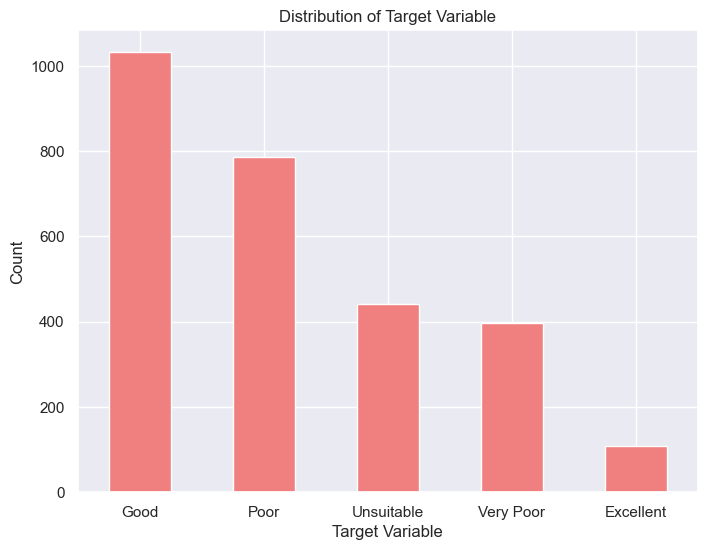

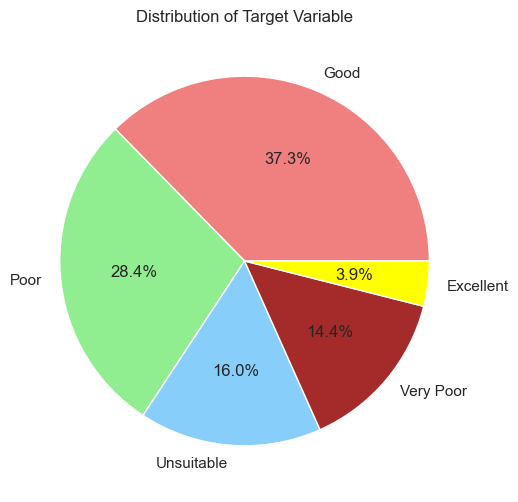

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['Good', 'Poor', 'Unsuitable', 'Very Poor', 'Excellent']

# Bar graph for target variable
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.gca().set_xticklabels(class_labels)  # Set class labels
plt.show()

# Pie plot for target variable
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue', 'brown', 'yellow'], labels=class_labels)
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [35]:
y_train

392           Good
1299     Very Poor
939           Poor
1601    Unsuitable
400           Poor
           ...    
496     Unsuitable
2333          Good
737           Poor
2345          Good
2367          Good
Name: WQI_CLASSIF, Length: 2211, dtype: object

Label Encoding the Target Variable

In [36]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical features in the training set
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Label encode categorical features in the test set
y_val = le.transform(y_val)

In [37]:
y_train

array([1, 4, 2, ..., 2, 1, 1])

In [38]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

# Random Forest Classifier

Hyperparameter tuning

In [39]:
# import optuna

# def objective(trial):
    
#     # Define hyperparameters to tune
#     n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
#     # Create Random Forest classifier with hyperparameters
#     rf_clf = RandomForestClassifier(n_estimators=n_estimators,
#                                     max_depth=max_depth,
#                                     min_samples_split=min_samples_split,
#                                     min_samples_leaf=min_samples_leaf,
#                                     max_features=max_features,
#                                     random_state=42)
    
#     # Train the model
#     rf_clf.fit(X_train, y_train)
    
#     # Predict validation set
#     y_pred = rf_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_rf_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Accuracy: 0.8933092224231465

Confusion Matrix:

[[ 16  11   0   0   0]

 [  0 195  12   0   0]

 [  0   6 146   1   7]

 [  0   0   0  75   6]

 [  0   0   8   8  62]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        27
           1       0.92      0.94      0.93       207
           2       0.88      0.91      0.90       160
           3       0.89      0.93      0.91        81
           4       0.83      0.79      0.81        78

    accuracy                           0.89       553

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

params1 = {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

rfc_model = RandomForestClassifier(**params1, random_state=42)

# Initialize StratifiedKFold with 5 folds
skf_rfc = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores_rfc = []

# Perform cross-validation
for train_index, val_index in skf_rfc.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    rfc_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = rfc_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_rfc.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_rfc = np.mean(accuracy_scores_rfc)
print("Average Accuracy:", average_accuracy_rfc)

Average Accuracy: 0.8842180525622301


# XGBoost Classifier

Hyperparameter tuning 

In [41]:
# import optuna
# from sklearn.model_selection import train_test_split
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# def objective(trial):
#     # Define hyperparameters to tune
#     params = {
#         'objective': 'multi:softmax',
#         'num_class': len(np.unique(y_train)),  # Number of unique classes in the target variable
#         'eval_metric': 'merror',
#         'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
#         'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 1, 15),
#         'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#         'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
#     }
    
#     # Create DMatrix for XGBoost
#     dtrain = xgb.DMatrix(X_train, label=y_train)
#     dval = xgb.DMatrix(X_val, label=y_val)
    
#     # Train the model
#     model = xgb.train(params, dtrain, evals=[(dval, 'eval')], early_stopping_rounds=10, verbose_eval=False)
    
#     # Predict validation set
#     y_pred = model.predict(dval)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_model = xgb.XGBClassifier(**best_params)
# best_model.fit(X_train, y_train)

# # Predict test set
# y_pred = best_model.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'booster': 'gbtree', 'lambda': 9.840140046063795e-06, 'alpha': 0.03538820629389226, 'max_depth': 6, 'eta': 0.7263362220896323, 'gamma': 5.0820087228436433e-05, 'grow_policy': 'lossguide'}

Accuracy: 0.9330922242314648

Confusion Matrix:

[[ 22   5   0   0   0]

 [  1 202   4   0   0]

 [  0   7 147   0   6]

 [  0   0   0  78   3]

 [  0   0   9   2  67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.94      0.98      0.96       207
           2       0.92      0.92      0.92       160
           3       0.97      0.96      0.97        81
           4       0.88      0.86      0.87        78

    accuracy                           0.93       553

In [42]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Define parameters for XGBoost model
params2 = {'booster': 'gbtree', 'lambda': 9.840140046063795e-06, 'alpha': 0.03538820629389226, 'max_depth': 6, 'eta': 0.7263362220896323, 'gamma': 5.0820087228436433e-05, 'grow_policy': 'lossguide'}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(**params2)

# Initialize StratifiedKFold with 5 folds
skf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores_xgb = []

# Perform cross-validation
for train_index, val_index in skf_xgb.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    xgb_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_xgb.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_xgb = np.mean(accuracy_scores_xgb)
print("Average Accuracy:", average_accuracy_xgb)

Average Accuracy: 0.9041173406330756


# LightGBM Classifier

Hyperparameter tuning

In [43]:
# import optuna
# from sklearn.model_selection import train_test_split
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# def objective(trial):
    
#     # Define hyperparameters to tune
#     params = {
#         'objective': 'multiclass',
#         'metric': 'multi_logloss',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#         'max_depth': trial.suggest_int('max_depth', 1, 15),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
#         'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
#         'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'num_class': len(np.unique(y_train)),  # Number of unique classes in the target variable
#         'random_state': 42
#     }
    
#     # Create LightGBM classifier with hyperparameters
#     lgb_clf = lgb.LGBMClassifier(**params)
    
#     # Train the model
#     lgb_clf.fit(X_train, y_train)
    
#     # Predict validation set
#     y_pred = lgb_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_lgb_clf = lgb.LGBMClassifier(**best_params, random_state=42)
# best_lgb_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_lgb_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'lambda_l1': 0.03611085268669487, 'lambda_l2': 0.00018733128295681632, 'num_leaves': 161, 'max_depth': 12, 'learning_rate': 0.1806354104829961, 'feature_fraction': 0.9118882159733598, 'bagging_fraction': 0.9246362691101389, 'bagging_freq': 4, 'min_child_samples': 73}

Accuracy: 0.9312839059674503

Confusion Matrix:

[[ 21   6   0   0   0]

 [  0 201   6   0   0]

 [  0   6 145   0   9]

 [  0   0   0  80   1]

 [  0   0   8   2  68]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       0.94      0.97      0.96       207
           2       0.91      0.91      0.91       160
           3       0.98      0.99      0.98        81
           4       0.87      0.87      0.87        78

    accuracy                           0.93       553

In [44]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

params3 = {'lambda_l1': 0.03611085268669487, 'lambda_l2': 0.00018733128295681632, 'num_leaves': 161, 'max_depth': 12, 'learning_rate': 0.1806354104829961, 'feature_fraction': 0.9118882159733598, 'bagging_fraction': 0.9246362691101389, 'bagging_freq': 4, 'min_child_samples': 73}

lgb_model = lgb.LGBMClassifier(**params3)

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Initialize StratifiedKFold with 5 folds
skf_lgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores_lgb = []

# Perform cross-validation
for train_index, val_index in skf_lgb.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    lgb_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = lgb_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_lgb.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_lgb = np.mean(accuracy_scores_lgb)
print("Average Accuracy:", average_accuracy_lgb)

[LightGBM] [Warning] feature_fraction is set=0.9118882159733598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9118882159733598
[LightGBM] [Warning] lambda_l1 is set=0.03611085268669487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03611085268669487
[LightGBM] [Warning] lambda_l2 is set=0.00018733128295681632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018733128295681632
[LightGBM] [Warning] bagging_fraction is set=0.9246362691101389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9246362691101389
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9118882159733598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9118882159733598
[LightGBM] [Warning] lambda_l1 is set=0.03611085268669487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03611085268669487
[LightGBM] [Warning] lamb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# CatBoost Classifier

Hyperparameter tuning

In [45]:
# import optuna
# from sklearn.model_selection import train_test_split
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# def objective(trial):
    
#     # Define hyperparameters to tune
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
#         'random_strength': trial.suggest_float('random_strength', 0.0, 10.0),
#     }
    
#     # Create CatBoost classifier with hyperparameters
#     catboost_clf = CatBoostClassifier(**params, random_state=42, verbose=False)
    
#     # Train the model
#     catboost_clf.fit(X_train, y_train)
    
#     # Predict validation set
#     y_pred = catboost_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_catboost_clf = CatBoostClassifier(**best_params, random_state=42, verbose=False)
# best_catboost_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_catboost_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'n_estimators': 600, 'learning_rate': 0.08339938262143001, 'max_depth': 5, 'colsample_bylevel': 0.9939599453413819, 'bagging_temperature': 0.6035654328436723, 'random_strength': 4.0555758860377935}

Accuracy: 0.9511754068716094

Confusion Matrix:

[[ 22   5   0   0   0]

 [  1 204   2   0   0]

 [  0   5 150   0   5]

 [  0   0   0  77   4]

 [  0   0   3   2  73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.95      0.99      0.97       207
           2       0.97      0.94      0.95       160
           3       0.97      0.95      0.96        81
           4       0.89      0.94      0.91        78

    accuracy                           0.95       553

In [46]:
import catboost as cat
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

params4 = {'n_estimators': 600, 'learning_rate': 0.08339938262143001, 'max_depth': 5, 'colsample_bylevel': 0.9939599453413819, 'bagging_temperature': 0.6035654328436723, 'random_strength': 4.0555758860377935}

cat_model = cat.CatBoostClassifier(**params4)

cat_model.fit(X_train, y_train)

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Initialize StratifiedKFold with 5 folds
skf_cat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores_cat = []

# Perform cross-validation
for train_index, val_index in skf_cat.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    cat_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = cat_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_cat.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_cat = np.mean(accuracy_scores_cat)
print("Average Accuracy:", average_accuracy_cat)

0:	learn: 1.4922636	total: 200ms	remaining: 1m 59s
1:	learn: 1.3677636	total: 223ms	remaining: 1m 6s
2:	learn: 1.2669865	total: 237ms	remaining: 47.2s
3:	learn: 1.1959631	total: 253ms	remaining: 37.6s
4:	learn: 1.1673937	total: 271ms	remaining: 32.2s
5:	learn: 1.1164741	total: 288ms	remaining: 28.5s
6:	learn: 1.0735507	total: 306ms	remaining: 25.9s
7:	learn: 1.0134793	total: 319ms	remaining: 23.6s
8:	learn: 0.9641910	total: 328ms	remaining: 21.6s
9:	learn: 0.9224538	total: 335ms	remaining: 19.8s
10:	learn: 0.8990414	total: 341ms	remaining: 18.3s
11:	learn: 0.8805469	total: 347ms	remaining: 17s
12:	learn: 0.8498565	total: 354ms	remaining: 16s
13:	learn: 0.8400394	total: 359ms	remaining: 15s
14:	learn: 0.8084265	total: 365ms	remaining: 14.2s
15:	learn: 0.7922005	total: 370ms	remaining: 13.5s
16:	learn: 0.7715649	total: 377ms	remaining: 12.9s
17:	learn: 0.7460484	total: 384ms	remaining: 12.4s


18:	learn: 0.7341513	total: 390ms	remaining: 11.9s
19:	learn: 0.7082166	total: 396ms	remaining: 11.5s
20:	learn: 0.7032884	total: 402ms	remaining: 11.1s
21:	learn: 0.6983078	total: 408ms	remaining: 10.7s
22:	learn: 0.6829666	total: 415ms	remaining: 10.4s
23:	learn: 0.6795937	total: 423ms	remaining: 10.1s
24:	learn: 0.6637445	total: 429ms	remaining: 9.86s
25:	learn: 0.6519336	total: 435ms	remaining: 9.59s
26:	learn: 0.6404526	total: 440ms	remaining: 9.34s
27:	learn: 0.6292762	total: 448ms	remaining: 9.16s
28:	learn: 0.6189617	total: 454ms	remaining: 8.94s
29:	learn: 0.6068728	total: 459ms	remaining: 8.72s
30:	learn: 0.5958158	total: 465ms	remaining: 8.54s
31:	learn: 0.5820840	total: 471ms	remaining: 8.35s
32:	learn: 0.5728861	total: 479ms	remaining: 8.23s
33:	learn: 0.5639503	total: 485ms	remaining: 8.08s
34:	learn: 0.5609544	total: 492ms	remaining: 7.94s
35:	learn: 0.5553046	total: 499ms	remaining: 7.81s
36:	learn: 0.5479655	total: 506ms	remaining: 7.7s
37:	learn: 0.5452620	total: 517m

# Voting Classifier

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier

# Assuming you have already defined and trained your individual models (model1, model2, model3, model4)

# Create voting classifier with hard voting
voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('cat', cat_model)], voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9118882159733598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9118882159733598
[LightGBM] [Warning] lambda_l1 is set=0.03611085268669487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03611085268669487
[LightGBM] [Warning] lambda_l2 is set=0.00018733128295681632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018733128295681632
[LightGBM] [Warning] bagging_fraction is set=0.9246362691101389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9246362691101389
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9118882159733598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9118882159733598
[LightGBM] [Warning] lambda_l1 is set=0.03611085268669487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03611085268669487
[LightGBM] [Warning] lamb

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(alpha=0.03538820629389226,
                                            base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eta=0.7263362220896323,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=5.0820087228436433e-05,
                                            gpu_id=None,
                                            grow_po...
                                            n_estimators=100, n_jobs=None, ...)),
                             ('lgb',
                              LGBMClassifier(bagging_fraction=0.9246362691101389,
                                             bagging_freq=4,
                                             feature_fraction=0.9118882159733598,
                                             lambda_l1=0.03611085268669487,
                                             lambda_l2=0.00018733128295681632,
                                             learning_rate=0.1806354104829961,
                                             max_depth=12, min_child_samples=73,
                                             num_leaves=161)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x00000224B27CCE10>)],
                 voting='soft')

In [52]:
import numpy as np

# Predict on the validation set
y_pred = voting_clf.predict(X_val)

[LightGBM] [Warning] feature_fraction is set=0.9118882159733598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9118882159733598
[LightGBM] [Warning] lambda_l1 is set=0.03611085268669487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03611085268669487
[LightGBM] [Warning] lambda_l2 is set=0.00018733128295681632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018733128295681632
[LightGBM] [Warning] bagging_fraction is set=0.9246362691101389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9246362691101389
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [53]:

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9168173598553345
Confusion Matrix:
[[ 17   5   0   0   0]
 [  2 201   4   0   0]
 [  0   8 142   0   7]
 [  0   0   0  82   6]
 [  0   0  11   3  65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.94      0.97      0.95       207
           2       0.90      0.90      0.90       157
           3       0.96      0.93      0.95        88
           4       0.83      0.82      0.83        79

    accuracy                           0.92       553
   macro avg       0.91      0.88      0.89       553
weighted avg       0.92      0.92      0.92       553



# Visualizations

In [ ]:
data = pd.read_csv('./data/quality_estimate_and_wqi.csv')
data['DISTRICT'] = df['District']
data

,pH,EC,TDS,Alk,TH,F,Cl,NO3,SO4,Ca,Mg,qi_wi,WQI,WQI_CLASSIF,DISTRICT
0,80.000000,5546.666667,1114.900,859.016667,483.666667,66.666667,2070.4,57.777778,328.8,202.666667,866.666667,0.052396,142.159351,Unsuitable,Ahmedabad
1,23.333333,238.333333,47.900,241.666667,93.333333,30.666667,20.0,0.511111,7.2,74.666667,113.333333,0.013130,35.625040,Good,Ahmedabad
2,72.000000,936.666667,188.300,225.000000,40.000000,21.333333,238.4,10.888889,92.0,21.333333,63.333333,0.013433,36.446308,Good,Ahmedabad
3,22.666667,2039.333333,409.900,959.100000,206.666667,233.333333,448.0,46.666667,158.8,197.333333,203.333333,0.078565,213.159892,Unsuitable,Ahmedabad
4,46.666667,414.333333,83.300,241.666667,70.000000,48.666667,73.6,4.888889,25.6,58.666667,80.000000,0.019160,51.984119,Poor,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.666667,118.666667,23.852,116.666667,53.333333,10.000000,11.2,6.666667,6.0,53.333333,50.000000,0.004518,12.257566,Excellent,Valsad
567,64.666667,222.666667,44.756,191.666667,80.000000,14.666667,28.4,8.888889,1.6,74.666667,80.000000,0.010091,27.378214,Good,Valsad
568,68.666667,213.666667,42.947,191.666667,76.666667,22.666667,22.8,26.666667,20.0,74.666667,73.333333,0.012606,34.201086,Good,Valsad
569,42.000000,314.333333,63.181,250.000000,133.333333,18.666667,45.6,53.333333,23.2,106.666667,163.333333,0.012333,33.460239,Good,Valsad


In [ ]:
ddf = pd.DataFrame(data.groupby('DISTRICT')['WQI_CLASSIF'].value_counts())
ddf

count
DISTRICT  WQI_CLASSIF       
Ahmedabad Unsuitable       5
          Poor             4
          Good             3
Amreli    Good            23
          Poor             5
...                      ...
Vadodra   Very Poor        1
Valsad    Good            10
          Excellent        2
          Poor             1
          Unsuitable       1

[118 rows x 1 columns]

In [ ]:
len(ddf.index.get_level_values(0).unique())

35

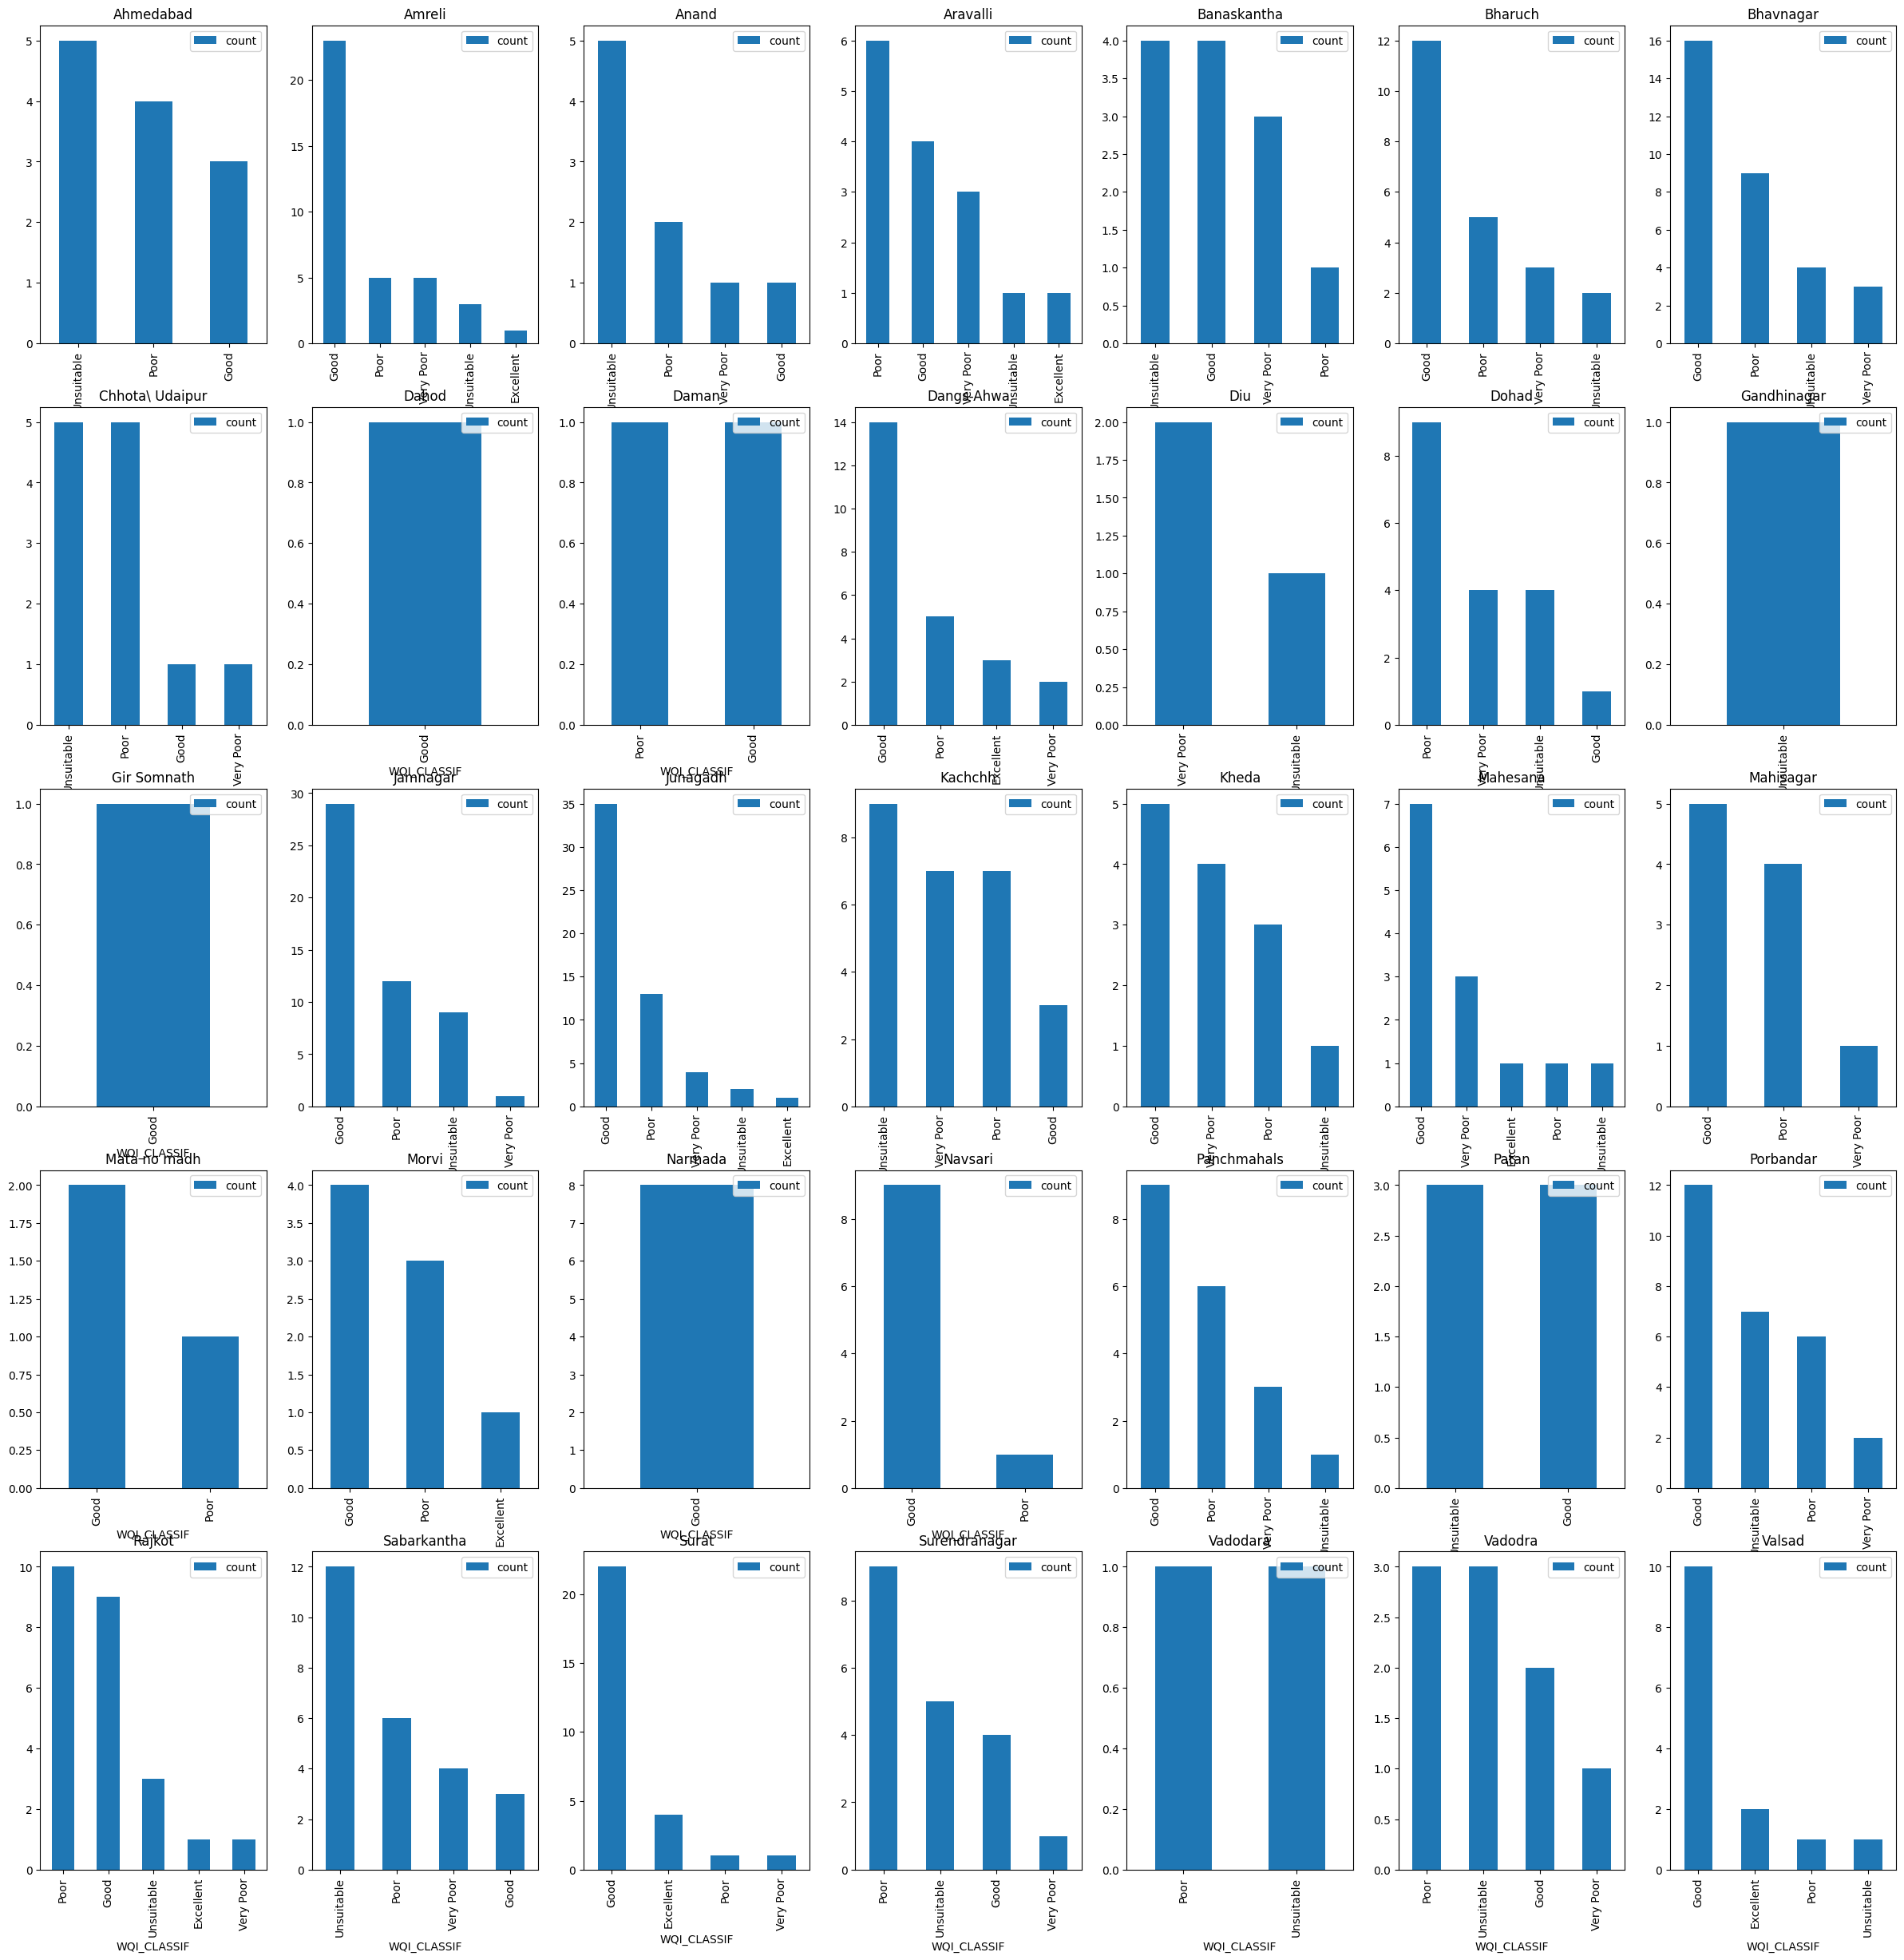

In [ ]:
fig, axes = plt.subplots(5, 7, figsize=(30,30))
# plot bar chart for each district in ddf dataframe for their WQI_CLASSIF
for district, ax in zip(ddf.index.get_level_values(0).unique(), axes.flatten()):
    ddf.loc[district].plot(kind='bar', ax=ax, title=district)
    # sns.countplot(data=ddf.loc[district], ax=ax)

In [ ]:
ddf1 = pd.DataFrame(data.groupby('DISTRICT')['WQI'].mean()).sort_values(by='WQI', ascending=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Gir Somnath'),
  Text(1, 0, 'Navsari'),
  Text(2, 0, 'Surat'),
  Text(3, 0, 'Narmada'),
  Text(4, 0, 'Dangs-Ahwa'),
  Text(5, 0, 'Mata no madh'),
  Text(6, 0, 'Morvi'),
  Text(7, 0, 'Daman'),
  Text(8, 0, 'Dahod'),
  Text(9, 0, 'Junagadh'),
  Text(10, 0, 'Valsad'),
  Text(11, 0, 'Mahisagar'),
  Text(12, 0, 'Amreli'),
  Text(13, 0, 'Panchmahals'),
  Text(14, 0, 'Aravalli'),
  Text(15, 0, 'Mahesana'),
  Text(16, 0, 'Bharuch'),
  Text(17, 0, 'Bhavnagar'),
  Text(18, 0, 'Rajkot'),
  Text(19, 0, 'Jamnagar'),
  Text(20, 0, 'Porbandar'),
  Text(21, 0, 'Kheda'),
  Text(22, 0, 'Vadodara'),
  Text(23, 0, 'Surendranagar'),
  Text(24, 0, 'Vadodra'),
  Text(25, 0, 'Banaskantha'),
  Text(26, 0, 'Diu'),
  Text(27, 0, 'Sabarkantha'),
  Text(28, 0, 'Dohad'),
  Text(29, 0, 'Gandhinagar'),
  Text(30, 0, 'Chhota\\ Udaipur'),
  T

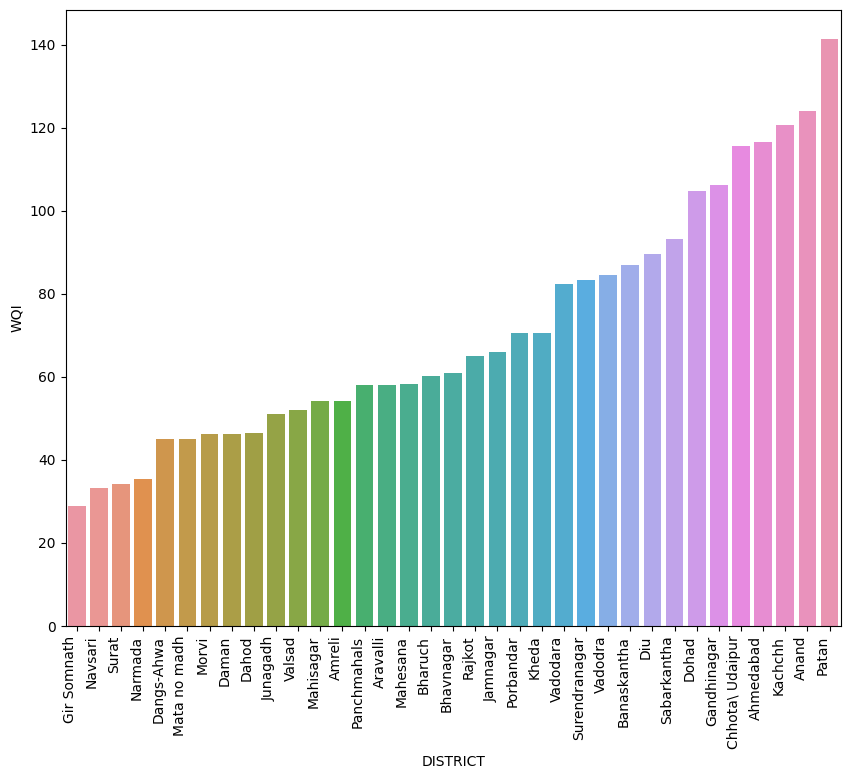

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=ddf1, x=ddf1.index, y='WQI')
plt.xticks(rotation=90, ha='right')